Name : Rajwardhan Sujit Dhumal<br>Class : TY-IT CORE<br>Batch : CORE 2<br>Enrollment No. MITU22BTIT0063

### Single Object tracking 

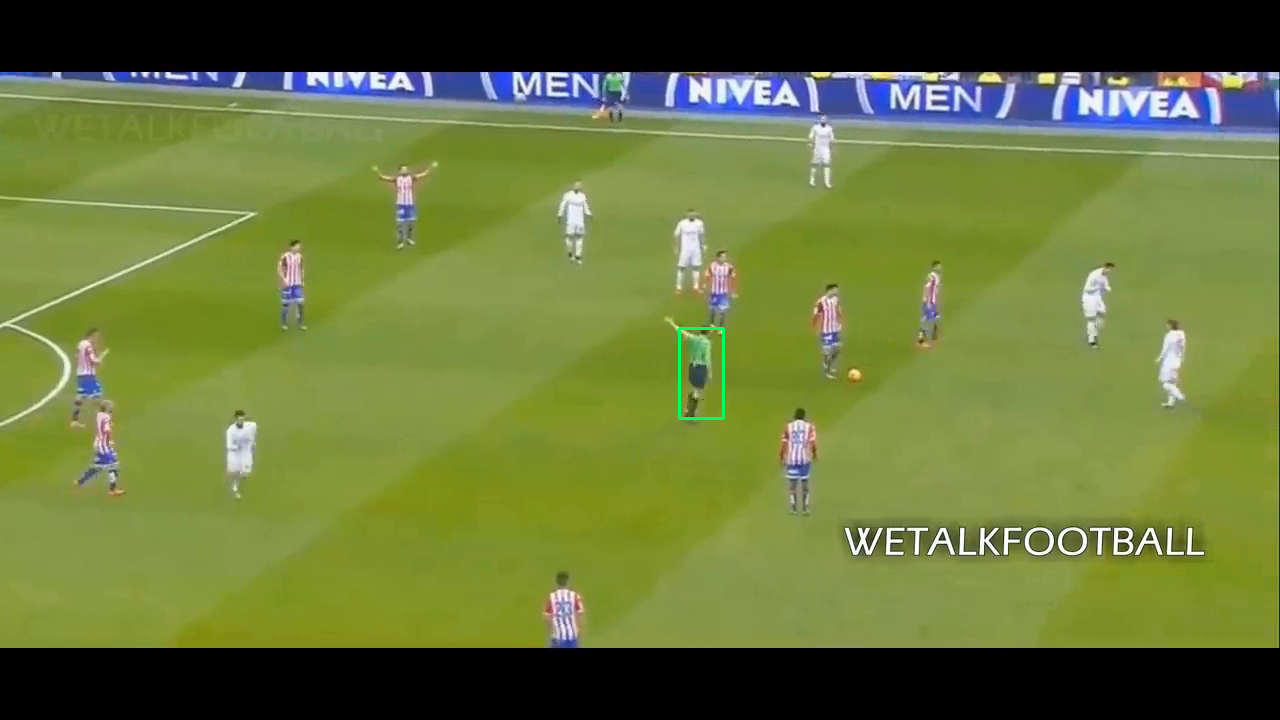

End of video


In [2]:
import cv2
import imutils
from IPython.display import display, clear_output
from PIL import Image
import time

# Tracker dictionary using the legacy module
rajwardhan_TrDict = {
        'csrt': cv2.legacy.TrackerCSRT_create,
        'kcf': cv2.legacy.TrackerKCF_create,
        'boosting': cv2.legacy.TrackerBoosting_create,
        'mil': cv2.legacy.TrackerMIL_create,
        'tld': cv2.legacy.TrackerTLD_create,
        'medianflow': cv2.legacy.TrackerMedianFlow_create,
        'mosse': cv2.legacy.TrackerMOSSE_create
}

tracker = rajwardhan_TrDict['csrt']()

v = cv2.VideoCapture(r'mot.mp4')

ret, frame = v.read()
if not ret:
    print("Error reading video file")
    v.release()
else:
    
    bb = cv2.selectROI('Frame', frame, False)
    tracker.init(frame, bb)
    cv2.destroyWindow('Frame')  

while True:
    ret, frame = v.read()
    if not ret:
        print("End of video")
        break

    (success, box) = tracker.update(frame)
    if success:
        (x, y, w, h) = [int(a) for a in box]
        cv2.rectangle(frame, (x, y), (x + w, y + h), (100, 255, 0), 2)

    
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    img = Image.fromarray(img)
    clear_output(wait=True)  
    display(img)

    time.sleep(0.05)  

v.release()


### Multiple Object Tracking

In [ ]:
import cv2
import numpy as np
import os

# Tracker dictionary with legacy module
rajwardhan_TrDict = {
        'csrt': cv2.legacy.TrackerCSRT_create,
        'kcf': cv2.legacy.TrackerKCF_create,
        'boosting': cv2.legacy.TrackerBoosting_create,
        'mil': cv2.legacy.TrackerMIL_create,
        'tld': cv2.legacy.TrackerTLD_create,
        'medianflow': cv2.legacy.TrackerMedianFlow_create,
        'mosse': cv2.legacy.TrackerMOSSE_create
}


trackers = cv2.legacy.MultiTracker_create()


v = cv2.VideoCapture(r'mot.mp4')


ret, frame = v.read()
if not ret:
    print("Error: Unable to read video file.")
    v.release()
    exit()


k = 4 
for i in range(k):
    cv2.imshow('Frame', frame)
    bbi = cv2.selectROI('Frame', frame, False)  
    tracker_i = rajwardhan_TrDict['csrt']()  
    trackers.add(tracker_i, frame, bbi)
    cv2.destroyWindow('Frame')  


frameNumber = 2
baseDir = r'TrackingResults'


os.makedirs(baseDir, exist_ok=True)


while True:
    ret, frame = v.read()
    if not ret:
        break

    
    success, boxes = trackers.update(frame)
    
   
    np.savetxt(f'{baseDir}/frame_{frameNumber}.txt', boxes, fmt='%f')
    frameNumber += 1

    
    for box in boxes:
        (x, y, w, h) = [int(a) for a in box]
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)

    
    cv2.imshow('Frame', frame)
    key = cv2.waitKey(5) & 0xFF
    if key == ord('q'):
        break

# Release resources
v.release()
cv2.destroyAllWindows()

# Load and verify tracking results for a specific frame
boxes = np.loadtxt(r'TrackingResults/frame_102.txt')
print(boxes)
